In [8]:
# THIS IS THE MAIN FILE USED TO CREATE ALL MODELS
# We have so far implemented two models: Logistic Regression and SVM.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import pickle

In [2]:
#####################################################
## TRAINED MODELS FOR PREDICTING THE 2021 PLAYOFFS ##
#####################################################


#####################################################
## PREDICTING THE 2021 EASTERN CONFERENCE PLAYOFFS ##
######################################################


##############################################################
## READING IN TRAINING DATA THAT HAS BEEN PREVIOSLY CLEANED ##
##############################################################

# Creating two empty lists that are used to store the data that is read in.
x_train_list = []
y_train_list = []
# Iterating through the data for all the years.
for i in range(2000, 2021):
    # We ignore the year of 2004, as there seems to me something wrong with the formatting of the data in out dataset.
    if i != 2004:
        # Assembling in the name of the file that contains the x data that needs to be trained.
        file_name = "season_stats/east" + str(i) + ".csv"
        # Reading the x data from the filename created above.
        df_x = pd.read_csv(file_name, index_col=0)
        # Sorting the data according to the values in the TEAM column.
        df_x = df_x.sort_values("TEAM")
        # Resetting the index of the data.
        df_x = df_x.reset_index()
        # Dropping the TEAM column in the data.
        df_x = df_x.drop("TEAM", axis=1)
        # Dropping the extra index column in the data.
        df_x = df_x.drop("index", axis=1)
        # Appending the current round of data to the overall list holding all the x data.
        x_train_list.append(df_x)
        # Assembling in the name of the file that contains the y data that needs to be trained.
        file_name = "playoff_labels/east" + str(i) + "playoff.csv"
        # Reading the y data from the filename created above.
        df_y = pd.read_csv(file_name, index_col=0)
        # Sorting the data according to the values in the TEAM column.
        df_y = df_y.sort_values("TEAM")
        # Resetting the index of the data.
        df_y = df_y.reset_index()
        # Dropping the TEAM column in the data.
        df_y = df_y.drop("TEAM", axis=1)
        # Dropping the extra index column in the data.
        df_y = df_y.drop("index", axis=1)
        # Appending the current round of data to the overall list holding all the y data.
        y_train_list.append(df_y)

# Concatentating the list of x data to a dataframe to hold all the x data.
x_train = pd.concat(x_train_list)
x_train = x_train.drop("MATCHUP", axis=1)
x_train = x_train.drop("WLPCT", axis=1)
# Concatentating the list of y data to a dataframe to hold all the y data.
y_train = pd.concat(y_train_list)

In [3]:
##############################
## READING IN THE TEST DATA ##
##############################

# Assembling in the name of the file that contains the x data that needs to be tested against.
x_test = pd.read_csv("season_stats/east2021.csv", index_col=0)
# Sorting the data according to the values in the TEAM column.
x_test = x_test.sort_values("TEAM")
# Resetting the index of the data.
x_test = x_test.reset_index()
# Dropping the extra index column in the data.
x_test = x_test.drop("index", axis=1)
x_test = x_test.drop("MATCHUP", axis=1)
x_test = x_test.drop("WLPCT", axis=1)
# Assigning the test data to a variable that tells us that this is the prediction that should be made.
x_test_prediction = x_test
# Dropping the TEAM column in the data.
x_test = x_test.drop("TEAM", axis=1)
# Assembling in the name of the file that contains the y data that needs to be tested against.
y_test = pd.read_csv("playoff_labels/east2021playoff.csv", index_col=0)
# Sorting the data according to the values in the TEAM column.
y_test = y_test.sort_values("TEAM")
# Resetting the index of the data.
y_test = y_test.reset_index()
# Dropping the extra index column in the data.
y_test = y_test.drop("index", axis=1)
# Assigning the test data to a variable that tells us that this is the prediction that should be made.
y_test_prediction = y_test
# Dropping the TEAM column in the data.
y_test = y_test.drop("TEAM", axis=1)

In [4]:
##############################
## STANDARDIZING THE X DATA ##
##############################
# Creating a scaler object.
sc = StandardScaler()
# Scaling the x training data.
x_train_scaled = sc.fit_transform(x_train)
# Scaling the x test data.
x_test_scaled = sc.transform(x_test)

In [5]:
############################
## NORMALIZING THE X DATA ##
############################
# Normalizing the x scaled training data.
a = preprocessing.normalize(x_train_scaled, axis = 0)
# Creating a new dataframe to hold the saled, normalized x training data.
x_train_normalized = pd.DataFrame(a, columns = x_train.columns)
# Normalizing the x scaled testing data.
b = preprocessing.normalize(x_test_scaled, axis = 0)
# Creating a new dataframe to hold the saled, normalized x testing data.
x_test_normalized = pd. DataFrame (b, columns = x_test.columns)

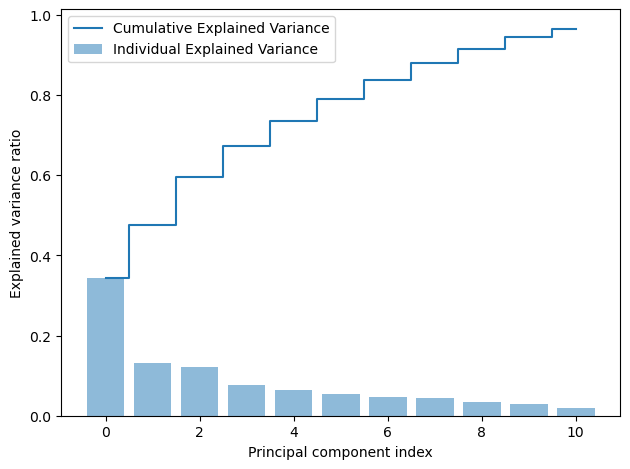

[0.34284598 0.13199175 0.12126027 0.075948   0.06362598 0.05492457
 0.0464762  0.04369437 0.0348276  0.03032188 0.01977894]


In [9]:
##################################
## Principle Component Analysis ##
##################################

# Decided to not use PCA because the model accuracy was either the same or worse with PCA

pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train_normalized)
x_test_pca = pca.transform(x_test_normalized)

explained_variance = pca.explained_variance_ratio_
cum_sum = np.cumsum(explained_variance)

plt.bar(range(0,len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

print(pca.explained_variance_ratio_)

In [122]:
###############################
## LOGISTIC REGRESSION MODEL ##
###############################

print("LOGISTIC REGRESSION MODEL FOR THE 2021 NBA SEASON IN THE EASTERN CONFERENCE")
print()
# Creating a logistic regression object.
east_logreg = LogisticRegression()
# Fitting the model with the normalized x training and y training data.
east_logreg.fit(x_train_normalized, np.ravel(y_train))
# Getting the score from the normalized x training and y trianing data.
east_logreg_train_score = east_logreg.score(x_train_normalized, y_train)
# Printing out this score.
print("Score for training data: " + str(east_logreg_train_score))
# Getting the score from the normalized x testing and y testing data.
east_logreg_test_score = east_logreg.score(x_test_normalized, y_test)
# Printing out this score.
print("Score for testing data: " + str(east_logreg_test_score))
print()
# Getting the names of the columns in the x training dataset.
train_feature_names = x_train.columns
print("Most important features for 2021 in the Eastern Conference")
# Calculating the coeffeicnt for the logistic regression model. 
coefficient_logreg = east_logreg.coef_
# Getting the most important coefficient value which would be the first one in the list.
importance_logreg = coefficient_logreg[0]
# Taking the absolute value of this coeffficient.
abs_importance_logreg = abs(importance_logreg)
# Making a list of the feature names, the importance coeffeicient and the absolute value of this coefficient.
importance_list_log = list(zip(train_feature_names, importance_logreg, abs_importance_logreg))
# Sorting this list according to the absolute values of the coefficient.
importance_list_log.sort(key=lambda x: x[2], reverse=True)
for i in range(5):
    print(importance_list_log[i])
print()
print("Predictions for which teams makes the playoffs for 2021 in the Eastern Conference")
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
east_predictions_2021_LR = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
logreg_probability = east_logreg.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
logreg_prediction = east_logreg.predict(x_test_normalized).tolist()
# Assigning the prediction value to the prediciotn column in the list.
east_predictions_2021_LR["PREDICTION"] = logreg_prediction
# Assigning the probabilities to the column in the list.
east_predictions_2021_LR["PROBABILITY"] = logreg_probability
# Sorting the list according to the porbability values.
east_predictions_2021_LR = east_predictions_2021_LR.sort_values("PROBABILITY", ascending=False)
print(east_predictions_2021_LR)
print()
print()

LOGISTIC REGRESSION MODEL FOR THE 2021 NBA SEASON IN THE EASTERN CONFERENCE

Score for training data: 0.8066666666666666
Score for testing data: 0.6666666666666666

Most important features for 2021 in the Eastern Conference
('PM', 4.192892339967322, 4.192892339967322)
('FGPCT', 1.5612884719530524, 1.5612884719530524)
('FG3PCT', 1.2539959951474446, 1.2539959951474446)
('TOV', -1.2041265228950269, 1.2041265228950269)
('STL', 1.1156588648834882, 1.1156588648834882)

Predictions for which teams makes the playoffs for 2021 in the Eastern Conference
   TEAM  PLAYOFF  PREDICTION  PROBABILITY
9   MIL        1           1     0.992836
1   BKN        1           1     0.991893
12  PHI        1           1     0.991308
0   ATL        1           1     0.941744
7   IND        0           1     0.938224
13  TOR        0           1     0.921534
2   BOS        1           1     0.852492
3   CHA        0           1     0.781242
10  NYK        1           1     0.754992
4   CHI        0           1  

In [124]:
###############
## SVM MODEL ##
###############

print("SVM MODEL FOR THE 2021 NBA SEASON IN THE EASTERN CONFERENCE")
print()
# Making SVM model.
east_svm = SVC(kernel="linear", probability=True)
# Fitting the data to the model.
east_svm.fit(x_train_normalized, np.ravel(y_train))
# Calculating the score from the x and y training data.
east_svm_train_score = east_svm.score(x_train_normalized, y_train)
# Printing the score for the training data.
print("Score for training data: " + str(east_svm_train_score))
# Printing the score for the test data.
east_svm_test_score = east_svm.score(x_test, y_test)
# Printing the score for the training data.
print("Score for testing data: " + str(east_svm_test_score))
print()
# Getting the names of the columns in the x training dataset.
train_feature_names_SVM = x_train.columns
print("Most important features for 2021 in the Eastern Conference")
# Calculating the coefficient for the SVM.
coefficient_svm = east_svm.coef_
# Getting the most important coefficient value which would be the first one in the list.
importance_svm = coefficient_svm[0]
# Taking the absolute value of this coeffficient.
abs_importance_svm = abs(importance_svm)
# Making a list of the feature names, the importance coeffeicient and the absolute value of this coefficient.
importance_list_svm = list(zip(train_feature_names_SVM, importance_svm, abs_importance_svm))
# Sorting this list according to the absolute values of the coefficient.
importance_list_svm.sort(key=lambda x: x[2], reverse=True)
for i in range(5):
    print(importance_list_svm[i])
print()
print("Predictions for which teams makes the playoffs for 2021 in the Eastern Conference")
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
east_predictions_2021_SVM = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
svm_probability = east_svm.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
svm_prediction = east_svm.predict(x_test_normalized).tolist()
# Assigning the prediction value to the prediciotn colum in the list.
east_predictions_2021_SVM["PREDICTION"] = svm_prediction
# Assigning the probabilities to the column in the list.
east_predictions_2021_SVM["PROBABILITY"] = svm_probability
# Sorting the list according to the porbability values.
east_predictions_2021_SVM = east_predictions_2021_SVM.sort_values("PROBABILITY", ascending=False)
print(east_predictions_2021_SVM)

SVM MODEL FOR THE 2021 NBA SEASON IN THE EASTERN CONFERENCE

Score for training data: 0.83
Score for testing data: 0.6666666666666666

Most important features for 2021 in the Eastern Conference
('PM', 6.619356851213325, 6.619356851213325)
('TOV', -2.128579788769111, 2.128579788769111)
('STL', 1.8783485152102481, 1.8783485152102481)
('FGA', -1.8565698743163028, 1.8565698743163028)
('FGPCT', 1.8146080083443126, 1.8146080083443126)

Predictions for which teams makes the playoffs for 2021 in the Eastern Conference
   TEAM  PLAYOFF  PREDICTION  PROBABILITY
1   BKN        1           1     1.000000
9   MIL        1           1     1.000000
12  PHI        1           1     1.000000
7   IND        0           1     1.000000
0   ATL        1           1     1.000000
13  TOR        0           1     1.000000
2   BOS        1           1     0.999997
10  NYK        1           1     0.985581
3   CHA        0           1     0.982082
8   MIA        1           1     0.974570
4   CHI        0      

In [7]:
####################################
## Random Forest Classifier Model ##
####################################


east_rf = RandomForestClassifier()
east_rf.fit(x_train_normalized, y_train)
# Getting the score from the normalized x training and y trianing data.
east_rf_train_score = east_rf.score(x_train_normalized, y_train)
# Printing out this score.
print("Score for training data: " + str(east_rf_train_score))
# Getting the score from the normalized x testing and y testing data.
east_rf_test_score = east_rf.score(x_test_normalized, y_test)
# Printing out this score.
print("Score for testing data: " + str(east_rf_test_score))
print()

# Getting the names of the columns in the x training dataset.
train_feature_names = x_train.columns

# Getting the feature importances for all of the features trained in the model
rf_importances = east_rf.feature_importances_
# Making a list of the feature importances and feature names
rf_importances = sorted(zip(rf_importances, train_feature_names), reverse=True)
# Sorting this list to find the most important features from the model
for i in range(5):
    print(rf_importances[i])

print()
print("Predictions for which teams makes the playoffs for 2021 in the Eastern Conference")
print()
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
east_predictions_2021 = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
rf_probability = east_rf.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
rf_prediction = east_rf.predict(x_test_normalized).tolist()
# Assinging the prediciotn value to the prediciotn colum in the list.
east_predictions_2021["PREDICTION"] = rf_prediction
# Assigning the probabilities to the column in the list..
east_predictions_2021["PROBABILITY"] = rf_probability
# Sorting the list according to the porbability values.
east_predictions_2021 = east_predictions_2021.sort_values("PROBABILITY", ascending=False)
with open('./results/east_predictions_2021_RF', 'wb') as f:
    pickle.dump(east_predictions_2021, f)
    f.close()
print(east_predictions_2021)

Score for training data: 1.0
Score for testing data: 0.7333333333333333

(0.3682823150021133, 'PM')
(0.07127428262574104, 'FGPCT')
(0.05233421326187582, 'DREB')
(0.04515225155753124, 'FG3PCT')
(0.04169765249831518, 'TOV')

Predictions for which teams makes the playoffs for 2021 in the Eastern Conference

   TEAM  PLAYOFF  PREDICTION  PROBABILITY
2   BOS        1           1         0.80
12  PHI        1           1         0.79
9   MIL        1           1         0.76
7   IND        0           1         0.74
13  TOR        0           1         0.72
8   MIA        1           1         0.67
10  NYK        1           1         0.65
0   ATL        1           1         0.63
1   BKN        1           1         0.63
4   CHI        0           1         0.62
6   DET        0           0         0.48
11  ORL        0           0         0.44
14  WAS        1           0         0.43
3   CHA        0           0         0.41
5   CLE        0           0         0.36


/var/folders/wq/kzy61k9n04l8p5wfbrlhxjlm0000gn/T/ipykernel_61102/657658998.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  east_rf.fit(x_train_normalized, y_train)


In [127]:
####################################
## Decision Tree Classifier Model ##
####################################

clf = DecisionTreeClassifier(max_depth=12, max_features=12, min_samples_leaf=20)
# Create dictionary of parameters to find the most optimal hyperparameters for the model
params = {'max_depth': [2, 4, 6, 8, 10, 12],
          'min_samples_leaf': [5, 10, 15, 20, 25, 30],
          'max_features': [10, 12, 14, 16, 18, 20]}
# Use GridSearchCV to find most optimal hyperparameters
grid_search = GridSearchCV(clf, params, cv = 10, scoring = 'accuracy')
# Fit the model to calculate the most optimal hyperparameters
grid_search.fit(x_train_normalized, y_train)

print(grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_ * 100)

{'max_depth': 2, 'max_features': 18, 'min_samples_leaf': 10}
Accuracy:  87.33333333333333


In [8]:
# Fit the model based on the optimized hyperparameters
clf = DecisionTreeClassifier(max_features=18, min_samples_leaf=10)
clf.fit(x_train_normalized, y_train)

train_feature_names = x_train.columns

# Getting the feature importances for all of the features trained in the model
dt_importances = clf.feature_importances_
# Sorting this list to find the most important features from the model
dt_importances = sorted(zip(dt_importances, train_feature_names), reverse=True)
# Sorting this list to find the most important features from the model
for i in range (5):
    print (dt_importances[i])

# Getting the score from the normalized x training and y trianing data.
east_dt_train_score = clf.score(x_train_normalized, y_train)
# east_logreg_train_score = east_logreg.score(x_train_normalized, y_train)
# Printing out this score.
print()
print("Score for training data: " + str(east_dt_train_score))
# Getting the score from the normalized x testing and y testing data.
east_dt_test_score = clf.score(x_test_normalized, y_test)
# Printing out this score.
print("Score for testing data: " + str(east_dt_test_score))
print()
print("Predictions for which teams makes the playoffs for 2021 in the Eastern Conference")
print()
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
east_predictions_2021 = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
dt_probability = clf.predict_proba(x_test_normalized)[:, 1].tolist()
# rf_probability = rf.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
dt_prediction = clf.predict(x_test_normalized).tolist()
# Assinging the prediciotn value to the prediciotn colum in the list.
east_predictions_2021["PREDICTION"] = dt_prediction
# Assigning the probabilities to the column in the list..
east_predictions_2021["PROBABILITY"] = dt_probability
# Sorting the list according to the porbability values.
east_predictions_2021 = east_predictions_2021.sort_values("PROBABILITY", ascending=False)
with open('./results/east_predictions_2021_DT', 'wb') as f:
    pickle.dump(east_predictions_2021, f)
    f.close()
print(east_predictions_2021)



(0.8349043177749178, 'PM')
(0.057417004187915475, 'TOV')
(0.04314102882228506, 'FGA')
(0.02922591398929668, 'OREB')
(0.01773646353899685, 'FTPCT')

Score for training data: 0.9133333333333333
Score for testing data: 0.7333333333333333

Predictions for which teams makes the playoffs for 2021 in the Eastern Conference

   TEAM  PLAYOFF  PREDICTION  PROBABILITY
0   ATL        1           1     1.000000
1   BKN        1           1     1.000000
2   BOS        1           1     1.000000
4   CHI        0           1     1.000000
7   IND        0           1     1.000000
9   MIL        1           1     1.000000
10  NYK        1           1     1.000000
12  PHI        1           1     1.000000
13  TOR        0           1     1.000000
8   MIA        1           1     0.941176
3   CHA        0           0     0.100000
6   DET        0           0     0.100000
11  ORL        0           0     0.100000
14  WAS        1           0     0.100000
5   CLE        0           0     0.000000


In [9]:
#####################################################
## PREDICTING THE 2021 WESTERN CONFERENCE PLAYOFFS ##
######################################################


##############################################################
## READING IN TRAINING DATA THAT HAS BEEN PREVIOSLY CLEANED ##
##############################################################

# Creating two empty lists that are used to store the data that is read in.
x_train_list = []
y_train_list = []
# Iterating through the data for all the years.
for i in range(2000, 2021):
    # We ignore the year of 2004, as there seems to me something wrong with the formatting of the data in out dataset.
    if i != 2004:
        # Assembling in the name of the file that contains the x data that needs to be trained.
        file_name = "season_stats/west" + str(i) + ".csv"
        # Reading the x data from the filename created above.
        df_x = pd.read_csv(file_name, index_col=0)
        # Sorting the data according to the values in the TEAM column.
        df_x = df_x.sort_values("TEAM")
        # Resetting the index of the data.
        df_x = df_x.reset_index()
        # Dropping the TEAM column in the data.
        df_x = df_x.drop("TEAM", axis=1)
        # Dropping the extra index column in the data.
        df_x = df_x.drop("index", axis=1)
        # Appending the current round of data to the overall list holding all the x data.
        x_train_list.append(df_x)
        # Assembling in the name of the file that contains the y data that needs to be trained.
        file_name = "playoff_labels/west" + str(i) + "playoff.csv"
        # Reading the y data from the filename created above.
        df_y = pd.read_csv(file_name, index_col=0)
        # Sorting the data according to the values in the TEAM column.
        df_y = df_y.sort_values("TEAM")
        # Resetting the index of the data.
        df_y = df_y.reset_index()
        # Dropping the TEAM column in the data.
        df_y = df_y.drop("TEAM", axis=1)
        # Dropping the extra index column in the data.
        df_y = df_y.drop("index", axis=1)
        # Appending the current round of data to the overall list holding all the y data.
        y_train_list.append(df_y)

# Concatentating the list of x data to a dataframe to hold all the x data.
x_train = pd.concat(x_train_list)
x_train = x_train.drop("MATCHUP", axis=1)
# x_train = x_train.drop("WLPCT", axis=1)
# Concatentating the list of y data to a dataframe to hold all the y data.
y_train = pd.concat(y_train_list)

In [10]:
##############################
## READING IN THE TEST DATA ##
##############################

# Assembling in the name of the file that contains the x data that needs to be tested against.
x_test = pd.read_csv("season_stats/west2021.csv", index_col=0)
# Sorting the data according to the values in the TEAM column.
x_test = x_test.sort_values("TEAM")
# Resetting the index of the data.
x_test = x_test.reset_index()
# Dropping the extra index column in the data.
x_test = x_test.drop("index", axis=1)
x_test = x_test.drop("MATCHUP", axis=1)
# x_test = x_test.drop("WLPCT", axis=1)
# Assigning the test data to a variable that tells us that this is the prediction that should be made.
x_test_prediction = x_test
# Dropping the TEAM column in the data.
x_test = x_test.drop("TEAM", axis=1)
# Assembling in the name of the file that contains the y data that needs to be tested against.
y_test = pd.read_csv("playoff_labels/west2021playoff.csv", index_col=0)
# Sorting the data according to the values in the TEAM column.
y_test = y_test.sort_values("TEAM")
# Resetting the index of the data.
y_test = y_test.reset_index()
# Dropping the extra index column in the data.
y_test = y_test.drop("index", axis=1)
# Assigning the test data to a variable that tells us that this is the prediction that should be made.
y_test_prediction = y_test
# Dropping the TEAM column in the data.
y_test = y_test.drop("TEAM", axis=1)

In [11]:
##############################
## STANDARDIZING THE X DATA ##
##############################
# Creating a scaler object.
sc = StandardScaler()
# Scaling the x training data.
x_train_scaled = sc.fit_transform(x_train)
# Scaling the x test data.
x_test_scaled = sc.transform(x_test)

In [12]:
############################
## NORMALIZING THE X DATA ##
############################
# Normalizing the x scaled training data.
a = preprocessing.normalize(x_train_scaled, axis = 0)
# Creating a new dataframe to hold the saled, normalized x training data.
x_train_normalized = pd.DataFrame(a, columns = x_train.columns)
# Normalizing the x scaled testing data.
b = preprocessing.normalize(x_test_scaled, axis = 0)
# Creating a new dataframe to hold the saled, normalized x testing data.
x_test_normalized = pd. DataFrame (b, columns = x_test.columns)

In [50]:
###############################
## LOGISTIC REGRESSION MODEL ##
###############################

print("LOGISTIC REGRESSION MODEL FOR THE 2021 NBA SEASON IN THE WESTERN CONFERENCE")
print()
# Creating a logistic regression object.
west_logreg = LogisticRegression()
# Fitting the model with the normalized x training and y training data.
west_logreg.fit(x_train_normalized, np.ravel(y_train))
# Getting the score from the normalized x training and y trianing data.
west_logreg_train_score = west_logreg.score(x_train_normalized, y_train)
# Printing out this score.
print("Score for training data: " + str(west_logreg_train_score))
# Getting the score from the normalized x testing and y testing data.
west_logreg_test_score = west_logreg.score(x_test_normalized, y_test)
# Printing out this score.
print("Score for testing data: " + str(west_logreg_test_score))
print()
# Getting the names of the columns in the x training dataset.
train_feature_names = x_train.columns
print("Most important features for 2021 in the Western Conference")
# Calculating the coeffeicnt for the logistic regression model.
coefficient_logreg = west_logreg.coef_
# Getting the most important coefficient value which would be the first one in the list.
importance_logreg = coefficient_logreg[0]
# Taking the absolute value of this coeffficient.
abs_importance_logreg = abs(importance_logreg)
# Making a list of the feature names, the importance coeffeicient and the absolute value of this coefficient.
importance_list_log = list(zip(train_feature_names, importance_logreg, abs_importance_logreg))
# Sorting this list according to the absolute values of the coefficient.
importance_list_log.sort(key=lambda x: x[2], reverse=True)
for i in range(5):
    print(importance_list_log[i])
print()
print("Predictions for which teams makes the playoffs for 2021 in the Western Conference")
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
west_predictions_2021_LR = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
logreg_probability = west_logreg.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
logreg_prediction = west_logreg.predict(x_test_normalized).tolist()
# Assigning the prediction value to the prediciotn column in the list.
west_predictions_2021_LR["PREDICTION"] = logreg_prediction
# Assigning the probabilities to the column in the list.
west_predictions_2021_LR["PROBABILITY"] = logreg_probability
# Sorting the list according to the porbability values.
west_predictions_2021_LR = west_predictions_2021_LR.sort_values("PROBABILITY", ascending=False)
print(west_predictions_2021_LR)
print()
print()

LOGISTIC REGRESSION MODEL FOR THE 2021 NBA SEASON IN THE WESTERN CONFERENCE

Score for training data: 0.8513513513513513
Score for testing data: 0.8

Most important features for 2021 in the Western Conference
('WLPCT', 3.9489615636330027, 3.9489615636330027)
('PM', 3.7495904218670852, 3.7495904218670852)
('FGPCT', 1.7897564091541547, 1.7897564091541547)
('TOV', -1.2066008015955436, 1.2066008015955436)
('AST', 1.0476024095510832, 1.0476024095510832)

Predictions for which teams makes the playoffs for 2021 in the Western Conference
   TEAM  PLAYOFF  PREDICTION  PROBABILITY
14  UTA        1           1     0.990260
5   LAL        1           1     0.982672
10  PHX        1           1     0.982620
4   LAC        1           1     0.979016
1   DEN        1           1     0.971793
6   MEM        1           1     0.791036
11  POR        1           1     0.788287
13  SAS        0           1     0.757186
0   DAL        1           1     0.755370
2   GSW        0           1     0.704276
8 

In [51]:
###############
## SVM MODEL ##
###############

print("SVM MODEL FOR THE 2021 NBA SEASON IN THE WESTERN CONFERENCE")
print()
# Making SVM model.
west_svm = SVC(kernel="linear", probability=True)
# Fitting the data to the model.
west_svm.fit(x_train_normalized, np.ravel(y_train))
# Calculating the score from the x and y training data.
west_svm_train_score = west_svm.score(x_train_normalized, y_train)
# Printing the score for the training data.
print("Score for training data: " + str(west_svm_train_score))
# Printing the score for the test data.
west_svm_test_score = west_svm.score(x_test, y_test)
# Printing the score for the training data.
print("Score for testing data: " + str(west_svm_test_score))
print()
# Getting the names of the columns in the x training dataset.
train_feature_names_SVM = x_train.columns
print("Most important features for 2021 in the Western Conference")
# Calculating the coefficient for the SVM.
coefficient_svm = west_svm.coef_
# Getting the most important coefficient value which would be the first one in the list.
importance_svm = coefficient_svm[0]
# Taking the absolute value of this coeffficient.
abs_importance_svm = abs(importance_svm)
# Making a list of the feature names, the importance coeffeicient and the absolute value of this coefficient.
importance_list_svm = list(zip(train_feature_names_SVM, importance_svm, abs_importance_svm))
# Sorting this list according to the absolute values of the coefficient.
importance_list_svm.sort(key=lambda x: x[2], reverse=True)
for i in range(5):
    print(importance_list_svm[i])
print()
print("Predictions for which teams makes the playoffs for 2021 in the Western Conference")
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
west_predictions_2021_SVM = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
svm_probability = west_svm.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
svm_prediction = west_svm.predict(x_test_normalized).tolist()
# Assigning the prediction value to the prediction column in the list.
west_predictions_2021_SVM["PREDICTION"] = svm_prediction
# Assigning the probabilities to the column in the list.
west_predictions_2021_SVM["PROBABILITY"] = svm_probability
# Sorting the list according to the probability values.
west_predictions_2021_SVM = west_predictions_2021_SVM.sort_values("PROBABILITY", ascending=False)
print(west_predictions_2021_SVM)


SVM MODEL FOR THE 2021 NBA SEASON IN THE WESTERN CONFERENCE

Score for training data: 0.8513513513513513
Score for testing data: 0.8666666666666667

Most important features for 2021 in the Western Conference
('WLPCT', 5.789988836508184, 5.789988836508184)
('PM', 5.168403969489876, 5.168403969489876)
('FGPCT', 2.228850098482319, 2.228850098482319)
('TOV', -1.642327804536691, 1.642327804536691)
('STL', 1.5457691263662912, 1.5457691263662912)

Predictions for which teams makes the playoffs for 2021 in the Western Conference
   TEAM  PLAYOFF  PREDICTION   PROBABILITY
5   LAL        1           1  1.000000e+00
10  PHX        1           1  1.000000e+00
14  UTA        1           1  1.000000e+00
4   LAC        1           1  1.000000e+00
1   DEN        1           1  1.000000e+00
6   MEM        1           1  9.967939e-01
13  SAS        0           1  9.608534e-01
0   DAL        1           1  9.563962e-01
11  POR        1           1  9.486330e-01
2   GSW        0           1  8.761792e-01


In [13]:
####################################
## Random Forest Classifier Model ##
####################################


west_rf = RandomForestClassifier()
west_rf.fit(x_train_normalized, y_train)
# Getting the score from the normalized x training and y trianing data.
east_rf_train_score = west_rf.score(x_train_normalized, y_train)
# Printing out this score.
print("Score for training data: " + str(east_rf_train_score))
# Getting the score from the normalized x testing and y testing data.
east_rf_test_score = west_rf.score(x_test_normalized, y_test)
# Printing out this score.
print("Score for testing data: " + str(east_rf_test_score))
print()

# Getting the names of the columns in the x training dataset.
train_feature_names = x_train.columns

# Getting the feature importances for all of the features trained in the model
rf_importances = west_rf.feature_importances_
# Making a list of the feature importances and feature names
rf_importances = sorted(zip(rf_importances, train_feature_names), reverse=True)
# Sorting this list to find the most important features from the model
for i in range(5):
    print(rf_importances[i])

print()
print("Predictions for which teams makes the playoffs for 2021 in the Eastern Conference")
print()
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
west_predictions_2021 = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
rf_probability = west_rf.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
rf_prediction = west_rf.predict(x_test_normalized).tolist()
# Assinging the prediciotn value to the prediciotn colum in the list.
west_predictions_2021["PREDICTION"] = rf_prediction
# Assigning the probabilities to the column in the list..
west_predictions_2021["PROBABILITY"] = rf_probability
# Sorting the list according to the porbability values.
west_predictions_2021 = west_predictions_2021.sort_values("PROBABILITY", ascending=False)
with open('./results/west_predictions_2021_RF', 'wb') as f:
    pickle.dump(west_predictions_2021, f)
    f.close()
print(west_predictions_2021)

Score for training data: 1.0
Score for testing data: 0.9333333333333333

(0.26514970909400637, 'WLPCT')
(0.23909790459114771, 'PM')
(0.06640495318311304, 'FGPCT')
(0.04104346034816583, 'AST')
(0.03810401550361123, 'DREB')

Predictions for which teams makes the playoffs for 2021 in the Eastern Conference

   TEAM  PLAYOFF  PREDICTION  PROBABILITY
1   DEN        1           1         0.72
5   LAL        1           1         0.72
4   LAC        1           1         0.70
14  UTA        1           1         0.70
10  PHX        1           1         0.61
11  POR        1           1         0.58
0   DAL        1           1         0.52
13  SAS        0           0         0.48
6   MEM        1           0         0.39
8   NOP        0           0         0.27
2   GSW        0           0         0.24
9   OKC        0           0         0.24
12  SAC        0           0         0.24
3   HOU        0           0         0.20
7   MIN        0           0         0.19


/var/folders/wq/kzy61k9n04l8p5wfbrlhxjlm0000gn/T/ipykernel_61102/2612849841.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  west_rf.fit(x_train_normalized, y_train)


In [98]:
####################################
## Decision Tree Classifier Model ##
####################################

clf = DecisionTreeClassifier(max_depth=4, max_features=12, min_samples_leaf=20)
# Create dictionary of parameters to find the most optimal hyperparameters for the model
params = {'max_depth': [2, 4, 6, 8, 10, 12],
          'min_samples_leaf': [5, 10, 15, 20, 25, 30],
          'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
# Use GridSearchCV to find most optimal hyperparameters
grid_search = GridSearchCV(clf, params, cv = 10, scoring = 'accuracy')
# Fit the model to calculate the most optimal hyperparameters
grid_search.fit(x_train_normalized, y_train)

print(grid_search.best_params_)
print("Accuracy: ", grid_search.best_score_ * 100)

{'max_depth': 4, 'max_features': 12, 'min_samples_leaf': 20}
Accuracy:  89.50574712643679


In [14]:
# Fit the model based on the optimized hyperparameters
clf = DecisionTreeClassifier(max_depth=4, max_features=12, min_samples_leaf=20)
clf.fit(x_train_normalized, y_train)

train_feature_names = x_train.columns

# Getting the feature importances for all of the features trained in the model
dt_importances = clf.feature_importances_
# Sorting this list to find the most important features from the model
dt_importances = sorted(zip(dt_importances, train_feature_names), reverse=True)
# Sorting this list to find the most important features from the model
for i in range (5):
    print (dt_importances[i])

# Getting the score from the normalized x training and y trianing data.
east_dt_train_score = clf.score(x_train_normalized, y_train)
# east_logreg_train_score = east_logreg.score(x_train_normalized, y_train)
# Printing out this score.
print()
print("Score for training data: " + str(east_dt_train_score))
# Getting the score from the normalized x testing and y testing data.
east_dt_test_score = clf.score(x_test_normalized, y_test)
# Printing out this score.
print("Score for testing data: " + str(east_dt_test_score))
print()
print("Predictions for which teams makes the playoffs for 2021 in the Eastern Conference")
print()
# Getting the teams and whether they made it to the playoffs in our testing data. This will be the prediction that we would like to match.
west_predictions_2021 = y_test_prediction[["TEAM", "PLAYOFF"]]
# Getting the probability of this predction, using the x data.
dt_probability = clf.predict_proba(x_test_normalized)[:, 1].tolist()
# rf_probability = rf.predict_proba(x_test_normalized)[:, 1].tolist()
# Making a new predcition.
dt_prediction = clf.predict(x_test_normalized).tolist()
# Assinging the prediciotn value to the prediciotn colum in the list.
west_predictions_2021["PREDICTION"] = dt_prediction
# Assigning the probabilities to the column in the list..
west_predictions_2021["PROBABILITY"] = dt_probability
# Sorting the list according to the porbability values.
west_predictions_2021 = west_predictions_2021.sort_values("PROBABILITY", ascending=False)
with open('./results/west_predictions_2021_DT', 'wb') as f:
    pickle.dump(west_predictions_2021, f)
    f.close()
print(west_predictions_2021)


(0.9233546871610396, 'PM')
(0.07587121846512959, 'WLPCT')
(0.0007740943738308154, 'PF')
(0.0, 'TOV')
(0.0, 'STL')

Score for training data: 0.8851351351351351
Score for testing data: 0.8666666666666667

Predictions for which teams makes the playoffs for 2021 in the Eastern Conference

   TEAM  PLAYOFF  PREDICTION  PROBABILITY
1   DEN        1           1     1.000000
4   LAC        1           1     1.000000
5   LAL        1           1     1.000000
10  PHX        1           1     1.000000
14  UTA        1           1     1.000000
0   DAL        1           1     0.921053
6   MEM        1           0     0.342105
2   GSW        0           0     0.166667
11  POR        1           0     0.166667
13  SAS        0           0     0.166667
3   HOU        0           0     0.000000
7   MIN        0           0     0.000000
8   NOP        0           0     0.000000
9   OKC        0           0     0.000000
12  SAC        0           0     0.000000
